In [48]:
# =================================================
# Cell 1: Environment Setup and Library Imports
# =================================================

# Core data manipulation and numerical computing libraries
import pandas as pd          
import numpy as np          

# Machine learning libraries from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Configure seaborn
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)
import random
random.seed(42)

# Display all columns in pandas DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Print confirmation
print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"🚀 XGBoost version: {xgb.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")

✅ All libraries imported successfully!
📊 Pandas version: 2.3.2
🔢 NumPy version: 1.26.4
🚀 XGBoost version: 3.0.5
📈 Matplotlib version: 3.10.3


In [49]:
# =================================================
# Cell 2: Data Loading and Initial Exploration
# =================================================

# --- Load Dataset ---
df = pd.read_csv('Biomass Data 04_11.csv')
print("📁 Dataset loaded successfully!")

# --- Basic Info ---
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   → {df.shape[0]} rows (observations)")
print(f"   → {df.shape[1]} columns (features + target)")

print("\n🔍 Preview:")
print("=" * 60)
display(df.head())

print("\n📋 Column Info:")
print("=" * 40)
print(df.info())

print("\n📈 Summary Statistics:")
print("=" * 50)
display(df.describe())

# --- Missing Values ---
print("\n❗ Missing Values:")
print("=" * 40)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing.values,
    'Missing_%': missing_pct.values
}).query("Missing_Count > 0")

if not missing_info.empty:
    display(missing_info)
else:
    print("✅ No missing values found.")

# --- Categorical Columns Overview ---
print("\n🏷️  Categorical Columns:")
print("=" * 40)
for col in df.columns:
    n_unique = df[col].nunique()
    if df[col].dtype == 'object' and n_unique < 20:
        print(f"{col}: {n_unique} unique → {list(df[col].unique())}")
    elif df[col].dtype in ['int64', 'float64'] and n_unique < 10:
        print(f"{col}: {n_unique} unique → {sorted(df[col].unique())}")

# --- Data Quality Checks ---
print("\n🔍 Data Quality Checks:")
print("=" * 35)
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

constant_cols = [c for c in df.columns if df[c].nunique() == 1]
if constant_cols:
    print(f"Constant columns (remove if needed): {constant_cols}")
else:
    print("✅ No constant columns found.")

# --- Memory Usage ---
print(f"\n💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# --- Target Variable Summary ---
print("\n🎯 Target Variable: %Glucose Yield")
if '%Glucose Yield' in df.columns:
    print(f"   → Range: {df['%Glucose Yield'].min():.3f} – {df['%Glucose Yield'].max():.3f}")
    print(f"   → Mean:  {df['%Glucose Yield'].mean():.3f}")
    print(f"   → Std:   {df['%Glucose Yield'].std():.3f}")
else:
    print("❌ Target variable '%Glucose Yield' not found.")

print("\n✅ Initial exploration completed.")

📁 Dataset loaded successfully!

📊 Dataset Shape: (533, 32)
   → 533 rows (observations)
   → 32 columns (features + target)

🔍 Preview:


,Reference,Ref No.,System No.,Data Point No.,Figure No. in paper,Index,Feed,Moisture Content (kg water/kg dry biomass),Glucan Content (% dry basis),Hemicellulose Content (% dry basis),Lignin Content (% dry basis),Country of Origin,Pre-treatment,Main-Pretreatment Agent,SO2 Concentration (%),CO2 pressure,Ammonia Loading (kg ammonia / kg dry biomass),Hot water solid-to-liquid ratio,Pretreatment Time (h),Pretreatment Temperature (°C),Hydrolysis Method,Hydrolysis Time(h),Conversion Temperature (°C),pH,Enzyme Name,enzyme unit is FPU (Y/N),Enzyme loading (FPU/g dry biomass),Enzyme loading (mg / g glucan),Severity Factor,Microbial Expression Used,% Xylose Yield,%Glucose Yield
0,Gao et al. (2011),R1,S1,D1,Figure -7(A),R1-S1-D1,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,3.952602,2.0594,N,3.652094,25.690589
1,Gao et al. (2011),R1,S1,D2,Figure -7(A),R1-S1-D2,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,7.916007,2.0594,N,6.370370,41.320834
2,Gao et al. (2011),R1,S1,D3,Figure -7(A),R1-S1-D3,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,11.943337,2.0594,N,9.346216,49.141093
3,Gao et al. (2011),R1,S1,D4,Figure -7(A),R1-S1-D4,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,15.932726,2.0594,N,12.386473,55.303799
4,Gao et al. (2011),R1,S1,D5,Figure -7(A),R1-S1-D5,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,19.945518,2.0594,N,15.491143,60.386704



📋 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Reference                                      533 non-null    object 
 1   Ref No.                                        533 non-null    object 
 2   System No.                                     533 non-null    object 
 3   Data Point No.                                 533 non-null    object 
 4   Figure No. in paper                            533 non-null    object 
 5   Index                                          533 non-null    object 
 6   Feed                                           533 non-null    object 
 7   Moisture Content (kg water/kg dry biomass)     533 non-null    float64
 8   Glucan Content (% dry basis)                   533 non-null    float64
 9   Hemicellulose Content (% dry basis)   

,Moisture Content (kg water/kg dry biomass),Glucan Content (% dry basis),Hemicellulose Content (% dry basis),Lignin Content (% dry basis),SO2 Concentration (%),CO2 pressure,Ammonia Loading (kg ammonia / kg dry biomass),Hot water solid-to-liquid ratio,Pretreatment Time (h),Pretreatment Temperature (°C),Hydrolysis Time(h),Conversion Temperature (°C),pH,Enzyme loading (FPU/g dry biomass),Enzyme loading (mg / g glucan),Severity Factor,% Xylose Yield,%Glucose Yield
count,533.000000,533.000000,533.000000,504.000000,152.000000,45.000000,30.000000,56.0,427.000000,427.000000,533.000000,533.000000,504.000000,268.000000,290.000000,427.000000,79.000000,533.000000
mean,0.115019,38.858131,15.991423,16.387017,10.815789,26.666667,1.400000,1.1,2.330211,136.079625,43.768283,55.384615,5.360714,18.078358,340.694569,2.747085,34.696830,45.678703
std,0.245624,4.721456,7.634175,12.687126,2.808268,6.741999,0.498273,0.0,5.516006,41.576992,32.112432,22.717046,1.439908,8.057693,606.219013,0.928359,26.634477,28.361783
min,0.000000,16.700000,1.772820,0.651000,3.000000,10.000000,1.000000,1.1,0.083333,25.000000,0.000000,45.000000,4.750000,10.000000,2.150000,-0.289500,0.845919,0.000000
25%,0.000000,36.903173,6.330374,5.884146,12.000000,30.000000,1.000000,1.1,0.416667,121.000000,24.000000,50.000000,4.800000,10.000000,25.882500,2.396500,11.974445,23.282350
50%,0.000000,38.900000,19.500000,17.000000,12.000000,30.000000,1.000000,1.1,0.833333,135.000000,48.000000,50.000000,5.000000,20.000000,54.195881,2.729499,27.388960,36.215565
75%,0.205000,41.940920,21.140000,20.757638,12.000000,30.000000,2.000000,1.1,1.333333,165.000000,72.000000,50.000000,5.000000,30.000000,60.444282,3.266023,60.476475,72.389180
max,1.500000,43.765240,26.000000,42.000000,12.000000,30.000000,2.000000,1.1,24.000000,220.000000,168.000000,160.000000,11.500000,30.000000,2395.209000,4.709300,88.002390,98.805350



❗ Missing Values:


,Column,Missing_Count,Missing_%
10,Lignin Content (% dry basis),29,5.440901
12,Pre-treatment,106,19.887430
13,Main-Pretreatment Agent,323,60.600375
14,SO2 Concentration (%),381,71.482176
15,CO2 pressure,488,91.557223
16,Ammonia Loading (kg ammonia / kg dry biomass),503,94.371482
17,Hot water solid-to-liquid ratio,477,89.493433
18,Pretreatment Time (h),106,19.887430
19,Pretreatment Temperature (°C),106,19.887430
23,pH,29,5.440901



🏷️  Categorical Columns:
Reference: 9 unique → ['Gao et al. (2011)', 'Kang et al.(2025)', 'Soudham et al(2015)', 'Banerjee et al,(2011)', 'Benkun Qi(2018)', 'Miao Gao et al. (2010)', 'Horn et al. (2011)', 'Krishnan et al. (2010)', 'Yamamoto et al. (2014)']
Ref No.: 9 unique → ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']
System No.: 9 unique → ['S1', 'S2', 'S3', 'S4', 'S5', 'S1 -(Black curve)', 'S6', 'S7', 'S8']
Feed: 10 unique → ['corn stover', 'spruce wood', 'Pine stem wood', 'Birch wood', 'Reed canary grass', 'Pine bark', 'wheat straw', 'rice straw', 'sugarcane bagasse', 'cane leaf']
Moisture Content (kg water/kg dry biomass): 6 unique → [0.0, 0.1, 0.11, 0.205, 0.6, 1.5]
Country of Origin: 4 unique → ['usa', 'sweden', 'china', 'finland']
Pre-treatment: 8 unique → ['AFEX', 'Hot water', nan, 'Acid', 'Ionic liquid', 'Alkali', 'SC-CO2', 'steam explosion', 'SEW fractionation']
Main-Pretreatment Agent: 5 unique → ['ammonia', 'water', nan, 'hydrogen peroxide', 'CO2', 'steam']
SO2

In [50]:
# ===========================================
# Cell 3 : Data Preprocessing for XGBoost
# ===========================================
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_processed = df.copy()

# STEP 1: Select relevant columns
feed_col, target_col = 'Feed', '%Glucose Yield'
try:
    start, end = df_processed.columns.get_loc(feed_col), df_processed.columns.get_loc(target_col)
    df_processed = df_processed.iloc[:, start:end+1]
except KeyError as e:
    raise KeyError(f"Column not found: {e}. Verify column names.")

# STEP 2: Identify columns *after* slicing
num_cols = df_processed.select_dtypes(include=[np.number]).columns
cat_cols = df_processed.select_dtypes(include=['object']).columns

# STEP 3: Handle missing values
if len(cat_cols) > 0:
    df_processed[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df_processed[cat_cols])
num_missing = df_processed[num_cols].isnull().sum().sum()
if num_missing > 0:
    print(f"⚠️ {num_missing} numerical NaNs retained (XGBoost handles them natively).")

# STEP 4: Remove duplicates and constants
df_processed = df_processed.drop_duplicates()
constant_cols = [c for c in df_processed.columns if df_processed[c].nunique() == 1]
if constant_cols:
    df_processed = df_processed.drop(columns=constant_cols)

# STEP 5: Outlier check (IQR method)
outlier_info = {}
for col in df_processed.select_dtypes(include=[np.number]).columns:
    Q1, Q3 = df_processed[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lb, ub = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    count = ((df_processed[col] < lb) | (df_processed[col] > ub)).sum()
    if count > 0:
        outlier_info[col] = count
if outlier_info:
    print("Outliers detected:", outlier_info)

# STEP 6: Encode categorical variables
cat_cols = df_processed.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    for col in cat_cols:
        df_processed[col] = LabelEncoder().fit_transform(df_processed[col].astype(str))

# STEP 7: Split and scale
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print(f"✅ Preprocessing complete → X: {X_scaled.shape}, y: {y.shape}")

⚠️ 3187 numerical NaNs retained (XGBoost handles them natively).
Outliers detected: {'Moisture Content (kg water/kg dry biomass)': 30, 'Glucan Content (% dry basis)': 14, 'SO2 Concentration (%)': 24, 'CO2 pressure': 10, 'Pretreatment Time (h)': 37, 'Pretreatment Temperature (°C)': 30, 'Hydrolysis Time(h)': 12, 'Conversion Temperature (°C)': 33, 'pH': 95, 'Enzyme loading (mg / g glucan)': 70, 'Severity Factor': 38}
✅ Preprocessing complete → X: (533, 24), y: (533,)


In [51]:
# =========================
# Cell 4: Train/Test Split
# =========================

from sklearn.model_selection import train_test_split

print("🚂 TRAIN/TEST SPLIT")
print("=" * 50)

# Fixed random seed for reproducibility
random_state = 42

# 70–30 split for balanced evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=random_state,
    stratify=None  # Not applicable for regression
)

# Split summary
print(f"✅ Split completed:")
print(f"   → Training: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   → Testing:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   → Features: {X_train.shape[1]}")

# Target variable distribution
print("\n📊 Target Distribution Check:")
print(f"   Training → Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}, Range: {y_train.min():.3f}–{y_train.max():.3f}")
print(f"   Testing  → Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}, Range: {y_test.min():.3f}–{y_test.max():.3f}")

🚂 TRAIN/TEST SPLIT
✅ Split completed:
   → Training: 373 samples (70.0%)
   → Testing:  160 samples (30.0%)
   → Features: 24

📊 Target Distribution Check:
   Training → Mean: 45.012, Std: 28.385, Range: 0.563–98.722
   Testing  → Mean: 47.233, Std: 28.335, Range: 0.000–98.805


In [52]:
# ============================================
# Cell 5: XGBoost Model Training & Evaluation
# ============================================
from xgboost import XGBRegressor
import time
from sklearn.metrics import mean_squared_error
import numpy as np

# XGBoost hyperparameters used:
xgb_params = {
    'objective': 'reg:squarederror',  # Regression task
    'n_estimators': 300,              # Number of boosting rounds (trees)
    'max_depth': 4,                   # Limits model complexity, prevents overfitting
    'learning_rate': 0.15,            # Step size shrinkage for gradual learning
    'subsample': 0.11,                # Fraction of samples per tree (reduces overfitting)
    'colsample_bytree': 0.75,         # Fraction of features per tree
    'min_child_weight': 1,            # Minimum instance weight per leaf (controls overfitting)
    'reg_alpha': 2,                   # L1 regularization (sparsity)
    'reg_lambda': 2,                  # L2 regularization (shrinkage)
    'random_state': random_state,     # Ensures reproducibility
    'n_jobs': -1,                     # Utilize all CPU cores
    'verbosity': 0,                   # Suppress training logs
    'eval_metric': 'rmse',            # Metric used to monitor training
}



print("🚀 Training XGBoost model...")
start_time = time.time()

# Train with evaluation tracking
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

training_time = time.time() - start_time
print(f"✅ Training completed in {training_time:.2f}s")

# Evaluation results
eval_results = xgb_model.evals_result()
train_rmse = eval_results['validation_0']['rmse']
test_rmse  = eval_results['validation_1']['rmse']

print("\n📈 Training progress:")
print(f"   → Final train RMSE: {train_rmse[-1]:.3f}")
print(f"   → Final test RMSE:  {test_rmse[-1]:.3f}")

# Overfitting check
rmse_diff = test_rmse[-1] - train_rmse[-1]
if rmse_diff > 1.0:
    print(f"   ⚠️ Overfitting detected (gap={rmse_diff:.3f})")
elif rmse_diff > 0.5:
    print(f"   ⚠️ Mild overfitting (gap={rmse_diff:.3f})")
else:
    print(f"   ✅ Minimal overfitting (gap={rmse_diff:.3f})")

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred  = xgb_model.predict(X_test)

# Quick check on prediction ranges
print("\n📊 Prediction ranges:")
print(f"   Train: {y_train_pred.min():.2f} → {y_train_pred.max():.2f} (mean={y_train_pred.mean():.2f})")
print(f"   Test:  {y_test_pred.min():.2f} → {y_test_pred.max():.2f} (mean={y_test_pred.mean():.2f})")

# Save model
model_filename = "xgboost_glucose_yield_model.json"
xgb_model.save_model(model_filename)
print(f"\n💾 Model saved to {model_filename}")


print("📊 MODEL EVALUATION WITH PARAMETERS")
print("=" * 55)

# --- Print parameters used ---
print("🔧 Model Parameters:")
for k, v in xgb_model.get_params().items():
    if k in ['n_estimators','max_depth','learning_rate','subsample',
             'colsample_bytree','min_child_weight','reg_alpha',
             'reg_lambda','tree_method']:
        print(f"   {k:20}: {v}")
print("-" * 55)

🚀 Training XGBoost model...
✅ Training completed in 117.89s

📈 Training progress:
   → Final train RMSE: 7.035
   → Final test RMSE:  8.927
   ⚠️ Overfitting detected (gap=1.893)

📊 Prediction ranges:
   Train: -5.96 → 102.27 (mean=44.74)
   Test:  -6.83 → 102.27 (mean=48.14)

💾 Model saved to xgboost_glucose_yield_model.json
📊 MODEL EVALUATION WITH PARAMETERS
🔧 Model Parameters:
   colsample_bytree    : 0.75
   learning_rate       : 0.15
   max_depth           : 4
   min_child_weight    : 1
   n_estimators        : 300
   reg_alpha           : 2
   reg_lambda          : 2
   subsample           : 0.11
   tree_method         : None
-------------------------------------------------------


📊 MODEL EVALUATION

1️⃣ PERFORMANCE METRICS
📈 Training Set:
   RMSE: 7.035 | MAE: 4.043 | R²: 0.938 | MAPE: 17.3%

🎯 Test Set:
   RMSE: 8.927 | MAE: 5.332 | R²: 0.900 | MAPE: 32.1%

   → Excellent performance (R² = 0.900)
   → Avg prediction error: ±5.33%

2️⃣ OVERFITTING CHECK
R² gap (train - test): 0.038
   ✅ Good generalization

3️⃣ VISUALIZATIONS


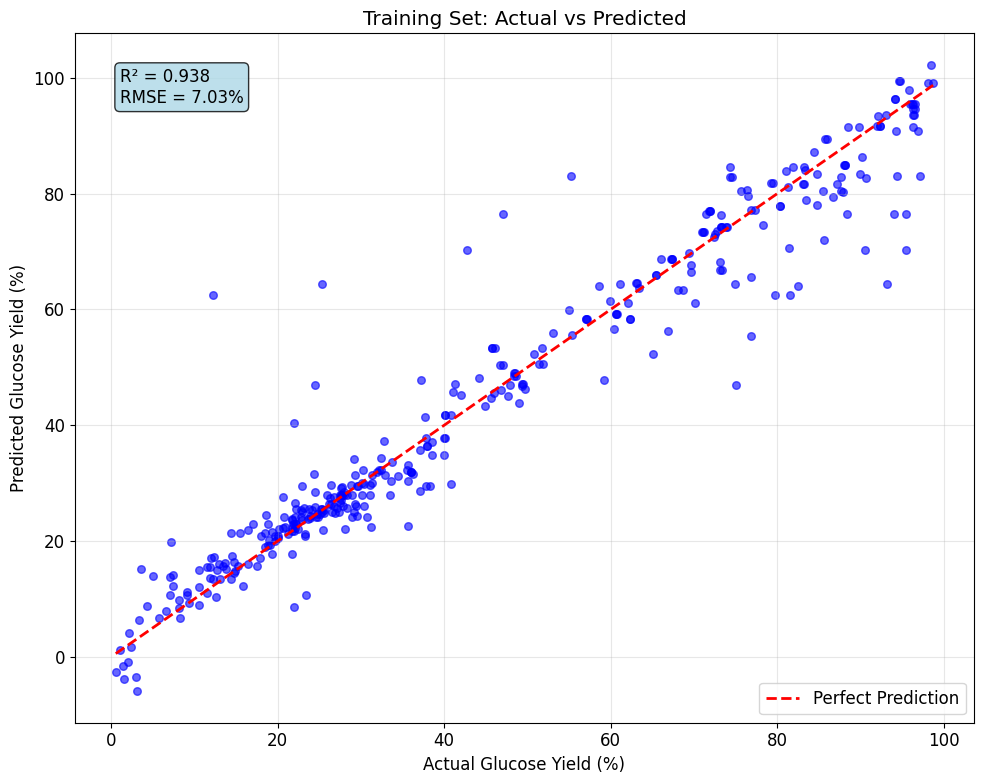

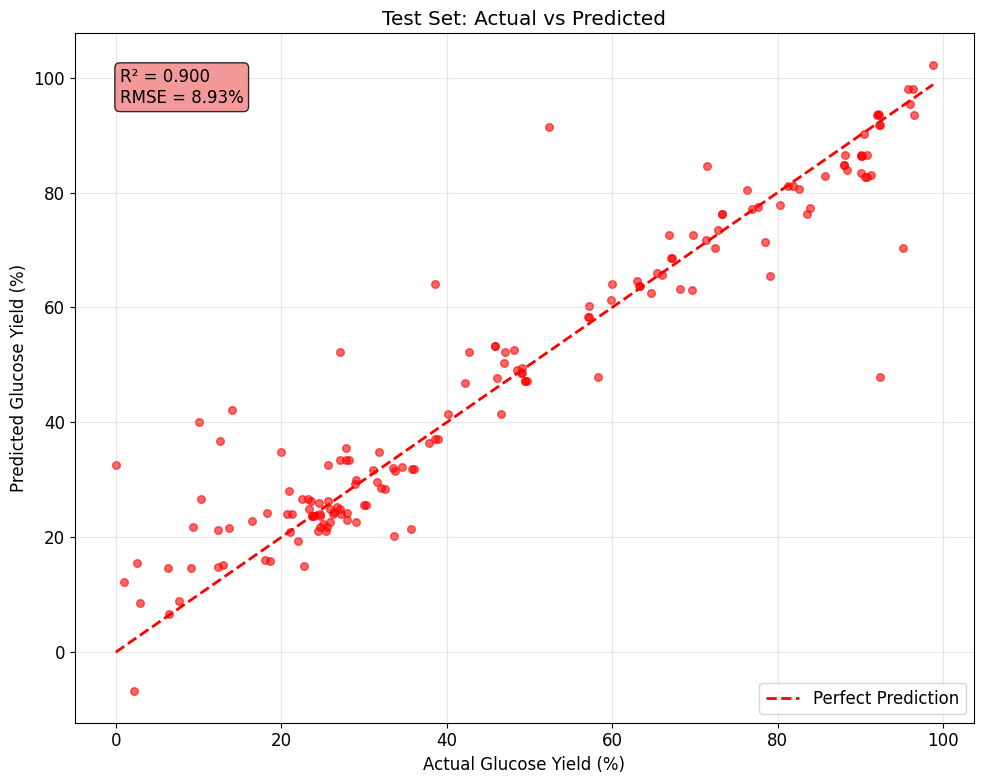

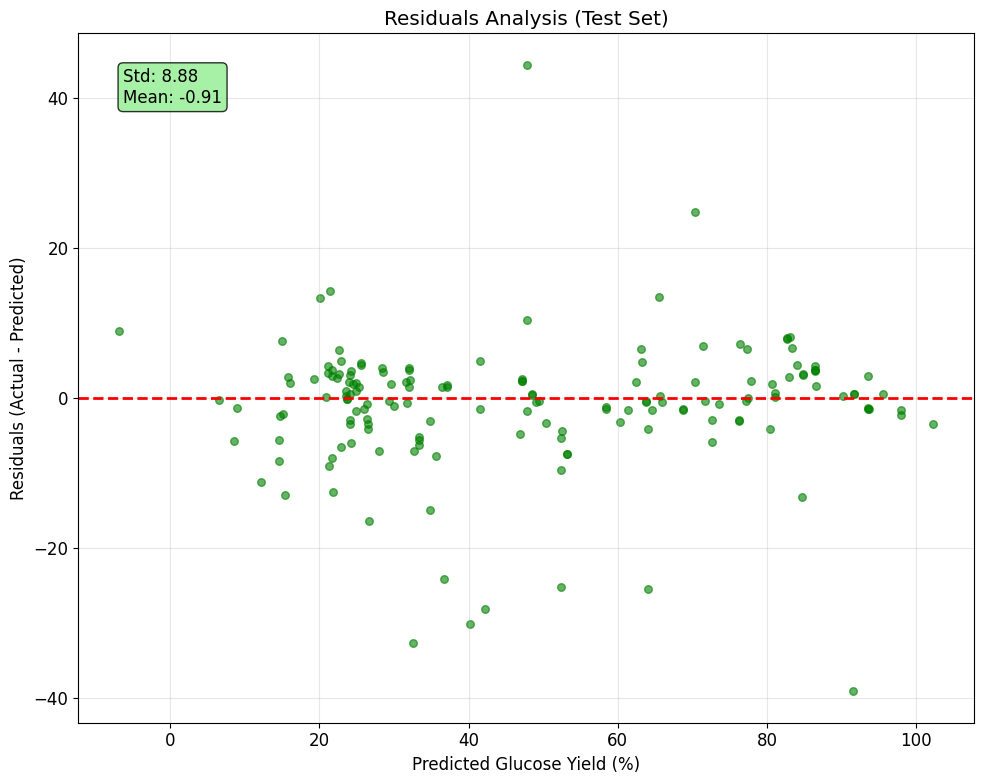

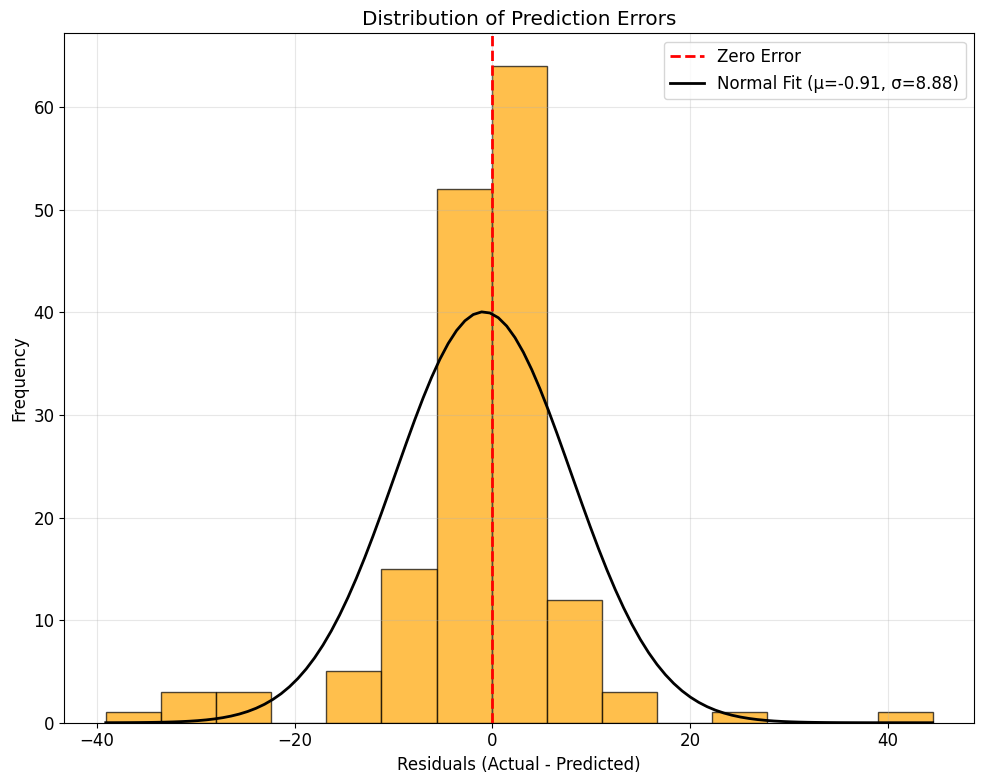


4️⃣ FEATURE IMPORTANCE
🔍 Top 15 Features:
    1. pH                                 : 25.31%
    2. Severity Factor                    : 7.72%
    3. Feed                               : 7.49%
    4. Pretreatment Time (h)              : 5.96%
    5. Enzyme loading (mg / g glucan)     : 5.80%
    6. Pretreatment Temperature (°C)      : 5.53%
    7. Pre-treatment                      : 5.23%
    8. Hemicellulose Content (% dry basis): 5.07%
    9. Hydrolysis Time(h)                 : 3.60%
   10. Lignin Content (% dry basis)       : 3.56%
   11. % Xylose Yield                     : 3.55%
   12. Country of Origin                  : 3.36%
   13. Main-Pretreatment Agent            : 2.53%
   14. SO2 Concentration (%)              : 2.35%
   15. Glucan Content (% dry basis)       : 2.24%


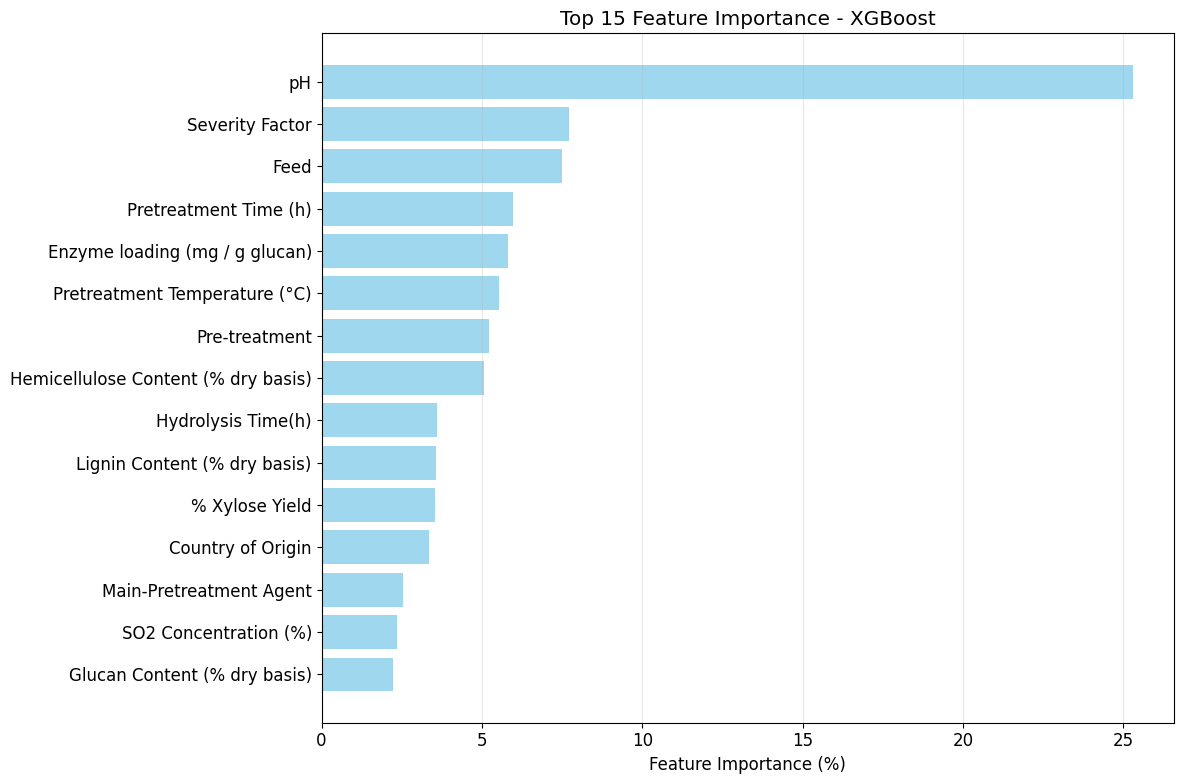


✅ Plots saved to 'xgboost_plots/' directory

5️⃣ SUMMARY
🎯 XGBoost Performance:
   → Test R²: 0.900 (90.0% variance explained)
   → Test RMSE: 8.93%
   → Test MAE: 5.33%
   → Typical error: ±5.3 percentage points



In [53]:
# ================================================
# Cell 6: Model Evaluation and Performance Metrics
# ================================================

from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, r2_score
import os

print("📊 MODEL EVALUATION")
print("=" * 50)

# Create output directory
os.makedirs('xgboost_plots', exist_ok=True)

# MAPE calculation helper
def calculate_mape(y_true, y_pred):
    mask = y_true > 1
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if np.sum(mask) > 0 else np.nan

# Calculate metrics for both sets
print(f"\n1️⃣ PERFORMANCE METRICS")
print("=" * 35)

# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = calculate_mape(y_train, y_train_pred)

print(f"📈 Training Set:")
print(f"   RMSE: {train_rmse:.3f} | MAE: {train_mae:.3f} | R²: {train_r2:.3f} | MAPE: {train_mape:.1f}%")

# Test metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = calculate_mape(y_test, y_test_pred)

print(f"\n🎯 Test Set:")
print(f"   RMSE: {test_rmse:.3f} | MAE: {test_mae:.3f} | R²: {test_r2:.3f} | MAPE: {test_mape:.1f}%")

# Interpretation
if test_r2 > 0.8:
    quality = "Excellent"
elif test_r2 > 0.6:
    quality = "Good"
elif test_r2 > 0.4:
    quality = "Moderate"
else:
    quality = "Poor"
print(f"\n   → {quality} performance (R² = {test_r2:.3f})")
print(f"   → Avg prediction error: ±{test_mae:.2f}%")

# Overfitting check
print(f"\n2️⃣ OVERFITTING CHECK")
print("=" * 30)

r2_gap = train_r2 - test_r2
print(f"R² gap (train - test): {r2_gap:.3f}")

if r2_gap > 0.1:
    print(f"   ⚠️  Significant overfitting detected")
elif r2_gap > 0.05:
    print(f"   ⚠️  Moderate overfitting")
else:
    print(f"   ✅ Good generalization")

# Visualizations
print(f"\n3️⃣ VISUALIZATIONS")
print("=" * 25)

# Plot 1: Training - Actual vs Predicted
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=30)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Glucose Yield (%)')
ax1.set_ylabel('Predicted Glucose Yield (%)')
ax1.set_title('Training Set: Actual vs Predicted')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.text(0.05, 0.95, f'R² = {train_r2:.3f}\nRMSE = {train_rmse:.2f}%',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
plt.tight_layout()
plt.savefig('xgboost_plots/01_training_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Test - Actual vs Predicted
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(y_test, y_test_pred, alpha=0.6, color='red', s=30)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Glucose Yield (%)')
ax2.set_ylabel('Predicted Glucose Yield (%)')
ax2.set_title('Test Set: Actual vs Predicted')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.text(0.05, 0.95, f'R² = {test_r2:.3f}\nRMSE = {test_rmse:.2f}%',
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
plt.tight_layout()
plt.savefig('xgboost_plots/02_test_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Residuals Analysis
residuals_test = y_test - y_test_pred
fig3, ax3 = plt.subplots(figsize=(10, 8))
ax3.scatter(y_test_pred, residuals_test, alpha=0.6, color='green', s=30)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Predicted Glucose Yield (%)')
ax3.set_ylabel('Residuals (Actual - Predicted)')
ax3.set_title('Residuals Analysis (Test Set)')
ax3.grid(True, alpha=0.3)
ax3.text(0.05, 0.95, f'Std: {np.std(residuals_test):.2f}\nMean: {np.mean(residuals_test):.2f}',
         transform=ax3.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
plt.tight_layout()
plt.savefig('xgboost_plots/03_residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 4: Error Distribution
from scipy import stats
fig4, ax4 = plt.subplots(figsize=(10, 8))
ax4.hist(residuals_test, bins=15, alpha=0.7, color='orange', edgecolor='black')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax4.set_xlabel('Residuals (Actual - Predicted)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Prediction Errors')
ax4.grid(True, alpha=0.3)

mu, sigma = stats.norm.fit(residuals_test)
x = np.linspace(residuals_test.min(), residuals_test.max(), 100)
y = stats.norm.pdf(x, mu, sigma) * len(residuals_test) * (residuals_test.max() - residuals_test.min()) / 15
ax4.plot(x, y, 'k-', linewidth=2, label=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})')
ax4.legend()
plt.tight_layout()
plt.savefig('xgboost_plots/04_error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
print(f"\n4️⃣ FEATURE IMPORTANCE")
print("=" * 30)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})
importance_df['Importance'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
importance_df = importance_df.sort_values('Importance', ascending=False)

print(f"🔍 Top 15 Features:")
for i, row in enumerate(importance_df.head(15).itertuples(), 1):
    print(f"   {i:2d}. {row.Feature:<35}: {row.Importance:.2f}%")

# Feature importance plot
fig5, ax5 = plt.subplots(figsize=(12, 8))
top_features = importance_df.head(15)
ax5.barh(range(len(top_features)), top_features['Importance'], color='skyblue', alpha=0.8)
ax5.set_yticks(range(len(top_features)))
ax5.set_yticklabels(top_features['Feature'])
ax5.set_xlabel('Feature Importance (%)')
ax5.set_title('Top 15 Feature Importance - XGBoost')
ax5.invert_yaxis()
ax5.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('xgboost_plots/05_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Plots saved to 'xgboost_plots/' directory")

# Final Summary
print(f"\n5️⃣ SUMMARY")
print("=" * 30)
print(f"🎯 XGBoost Performance:")
print(f"   → Test R²: {test_r2:.3f} ({test_r2*100:.1f}% variance explained)")
print(f"   → Test RMSE: {test_rmse:.2f}%")
print(f"   → Test MAE: {test_mae:.2f}%")
print(f"   → Typical error: ±{test_mae:.1f} percentage points")

print("\n" + "=" * 50)


Training Set:
   → Outliers detected: 36 (9.7%)
   → Residual bounds: [-8.97, 9.30]

Test Set:
   → Outliers detected: 17 (10.6%)
   → Residual bounds: [-12.44, 12.15]

📋 TEST SET OUTLIERS (17 rows):


,Index,Reference,Row_Number,Actual,Predicted,Residual,APE_%
0,R3-S4-D1,Soudham et al(2015),104,0.000000,32.589653,-32.589653,inf
7,R7-S1-D2,Horn et al. (2011),302,2.612973,15.472058,-12.859085,492.124691
5,R3-S3-D1,Soudham et al(2015),90,10.012010,40.145367,-30.133357,300.972099
9,R3-S2-D2,Soudham et al(2015),77,14.084510,42.171928,-28.087418,199.420629
10,R3-S1-D2,Soudham et al(2015),63,12.634410,36.734070,-24.099660,190.746223
4,R7-S1-D54,Horn et al. (2011),354,10.311980,26.648455,-16.336475,158.422288
13,R2-S2-D5,Kang et al.(2025),39,9.334942,21.785448,-12.450506,133.375284
1,R3-S1-D11,Soudham et al(2015),72,27.150540,52.335785,-25.185245,92.761488
16,R3-S4-D10,Soudham et al(2015),113,52.394370,91.476906,-39.082536,74.593007
6,R3-S2-D9,Soudham et al(2015),84,20.000000,34.872066,-14.872066,74.360332



📋 TRAINING SET OUTLIERS (36 rows):


,Index,Reference,Row_Number,Actual,Predicted,Residual,APE_%
26,R3-S3-D9,Soudham et al(2015),98,12.250710,62.473289,-50.222579,409.956480
23,R5-S1 -(Black curve)-D9,Benkun Qi(2018),240,3.579880,15.185452,-11.605572,324.188868
12,R5-S1 -(Black curve)-D8,Benkun Qi(2018),239,4.990140,13.996227,-9.006087,180.477647
24,R7-S1-D51,Horn et al. (2011),351,7.228015,19.795506,-12.567491,173.871949
16,R3-S4-D9,Soudham et al(2015),112,25.352110,64.402779,-39.050669,154.033209
33,R3-S1-D10,Soudham et al(2015),71,24.462370,46.918575,-22.456205,91.798976
29,R3-S3-D2,Soudham et al(2015),91,21.937320,40.313110,-18.375790,83.764974
32,R3-S3-D10,Soudham et al(2015),99,42.735040,70.312241,-27.577201,64.530654
25,R3-S3-D11,Soudham et al(2015),100,47.008550,76.441963,-29.433413,62.612893
18,R5-S1 -(Black curve)-D1,Benkun Qi(2018),232,22.021700,8.528562,13.493138,61.272011



✅ Outliers saved to:
   → 'xgboost_plots/train_outliers.csv'
   → 'xgboost_plots/test_outliers.csv'

📊 Generating outlier visualizations...


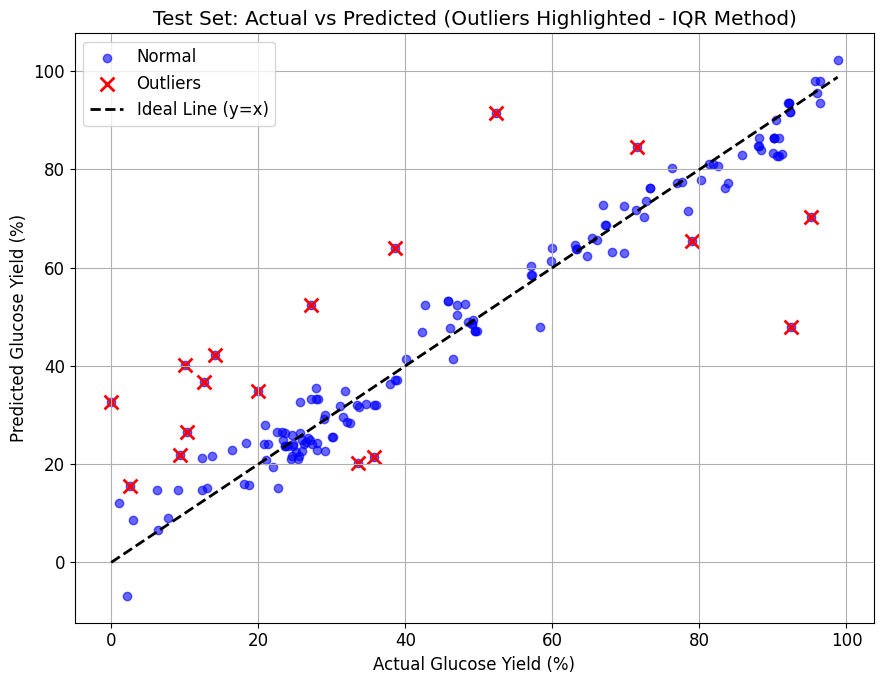

✅ Saved plot: xgboost_plots/test_outliers_plot.png


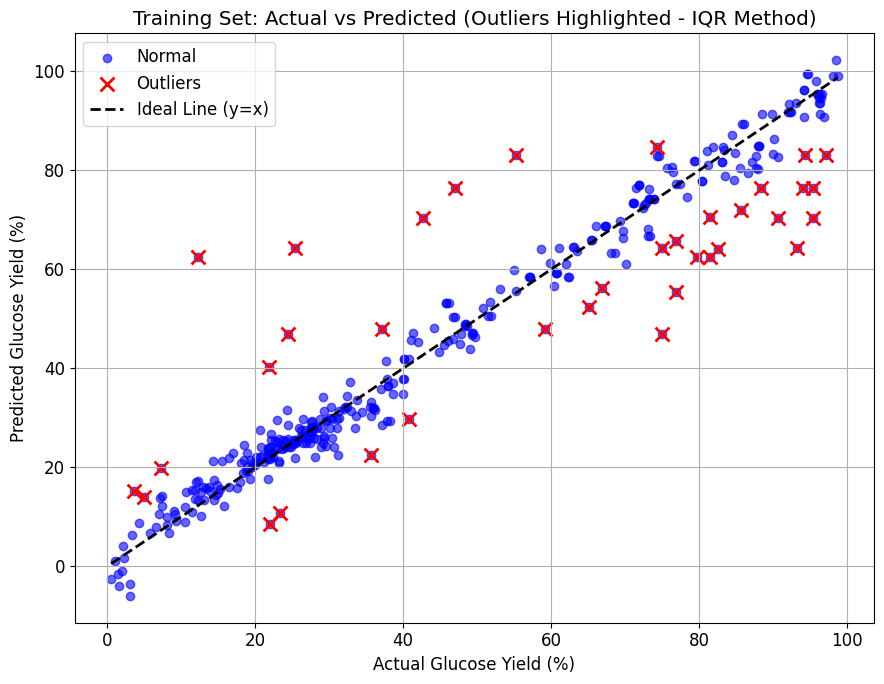

✅ Saved plot: xgboost_plots/train_outliers_plot.png

✅ Outlier detection and visualization complete!


In [54]:
# ==================================================
# Cell 7 : OUTLIER DETECTION USING IQR METHOD 
# ==================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the original dataset to retrieve Reference and Index columns
df_original = pd.read_csv("Biomass Data 22_10.csv")

# Compute residuals and errors
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred
train_ape = np.abs((y_train - y_train_pred) / y_train) * 100
test_ape = np.abs((y_test - y_test_pred) / y_test) * 100

# --- IQR Detection Function ---
def detect_outliers_iqr(residuals, dataset_name="Dataset"):
    Q1 = np.percentile(residuals, 25)
    Q3 = np.percentile(residuals, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask = (residuals < lower) | (residuals > upper)
    outlier_count = np.sum(outlier_mask)
    outlier_percentage = (outlier_count / len(residuals)) * 100
    print(f"\n{dataset_name}:")
    print(f"   → Outliers detected: {outlier_count} ({outlier_percentage:.1f}%)")
    print(f"   → Residual bounds: [{lower:.2f}, {upper:.2f}]")
    return outlier_mask

train_outliers = detect_outliers_iqr(train_residuals, "Training Set")
test_outliers = detect_outliers_iqr(test_residuals, "Test Set")

# --- Collect Outlier DataFrames ---
test_outliers_df = pd.DataFrame({
    "Row_Number": y_test[test_outliers].index,
    "Actual": y_test[test_outliers].values,
    "Predicted": y_test_pred[test_outliers],
    "Residual": test_residuals[test_outliers].values,
    "APE_%": test_ape[test_outliers].values
}).sort_values("APE_%", ascending=False)

train_outliers_df = pd.DataFrame({
    "Row_Number": y_train[train_outliers].index,
    "Actual": y_train[train_outliers].values,
    "Predicted": y_train_pred[train_outliers],
    "Residual": train_residuals[train_outliers].values,
    "APE_%": train_ape[train_outliers].values
}).sort_values("APE_%", ascending=False)

# --- Merge with Original Dataset to get Reference + Index ---
test_outliers_df = test_outliers_df.merge(
    df_original[["Index", "Reference"]],
    left_on="Row_Number",
    right_index=True,
    how="left"
)[["Index", "Reference", "Row_Number", "Actual", "Predicted", "Residual", "APE_%"]]

train_outliers_df = train_outliers_df.merge(
    df_original[["Index", "Reference"]],
    left_on="Row_Number",
    right_index=True,
    how="left"
)[["Index", "Reference", "Row_Number", "Actual", "Predicted", "Residual", "APE_%"]]

# --- Print Results ---
print(f"\n📋 TEST SET OUTLIERS ({len(test_outliers_df)} rows):")
display(test_outliers_df)

print(f"\n📋 TRAINING SET OUTLIERS ({len(train_outliers_df)} rows):")
display(train_outliers_df)

# --- Save to CSV ---
test_outliers_df.to_csv('xgboost_plots/test_outliers.csv', index=False)
train_outliers_df.to_csv('xgboost_plots/train_outliers.csv', index=False)
print(f"\n✅ Outliers saved to:")
print(f"   → 'xgboost_plots/train_outliers.csv'")
print(f"   → 'xgboost_plots/test_outliers.csv'")

# --- Visualization ---
print("\n📊 Generating outlier visualizations...")

plt.figure(figsize=(9, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Normal')
plt.scatter(y_test[test_outliers], y_test_pred[test_outliers],
            color='red', s=100, marker='x', linewidths=2, label='Outliers')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=2, label='Ideal Line (y=x)')
plt.xlabel("Actual Glucose Yield (%)")
plt.ylabel("Predicted Glucose Yield (%)")
plt.title("Test Set: Actual vs Predicted (Outliers Highlighted - IQR Method)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboost_plots/test_outliers_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved plot: xgboost_plots/test_outliers_plot.png")

plt.figure(figsize=(9, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Normal')
plt.scatter(y_train[train_outliers], y_train_pred[train_outliers],
            color='red', s=100, marker='x', linewidths=2, label='Outliers')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
         'k--', lw=2, label='Ideal Line (y=x)')
plt.xlabel("Actual Glucose Yield (%)")
plt.ylabel("Predicted Glucose Yield (%)")
plt.title("Training Set: Actual vs Predicted (Outliers Highlighted - IQR Method)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboost_plots/train_outliers_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved plot: xgboost_plots/train_outliers_plot.png")

print("\n✅ Outlier detection and visualization complete!")

In [55]:
# ================================================
# Cell 8: Export Metrics to Excel (Neat, Append-Safe, Auto-Formatted)
# ================================================
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import skew, kurtosis, pearsonr
from openpyxl import load_workbook
from openpyxl.styles import Alignment
from openpyxl.utils import get_column_letter

# Install openpyxl if missing
try:
    import openpyxl
except ImportError:
    import subprocess, sys
    print("📦 Installing openpyxl...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])
    import openpyxl

print("💾 EXPORTING METRICS TO EXCEL")
print("=" * 60)

# --- SETTINGS ---
MODEL_NAME = 'XGBoost'  # ← Change per model
excel_file = 'Model_Comparison_Results.xlsx'

# --- CALCULATE METRICS ---
train_mape = calculate_mape(y_train, y_train_pred)
test_mape = calculate_mape(y_test, y_test_pred)
train_corr, _ = pearsonr(y_train, y_train_pred)
test_corr, _ = pearsonr(y_test, y_test_pred)
r2_diff = train_r2 - test_r2
rmse_diff = test_rmse - train_rmse

metrics_data = {
    'Model': MODEL_NAME,
    'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    
    # Train Metrics
    'Train_RMSE': train_rmse,
    'Train_MAE': train_mae,
    'Train_R2': train_r2,
    'Train_MAPE': train_mape,
    'Train_Pearson': train_corr,
    
    # Test Metrics
    'Test_RMSE': test_rmse,
    'Test_MAE': test_mae,
    'Test_R2': test_r2,
    'Test_MAPE': test_mape,
    'Test_Pearson': test_corr,
    
    # Overfitting
    'R2_Gap': r2_diff,
    'RMSE_Gap': rmse_diff,
    'Overfitting_Level': 'Significant' if r2_diff > 0.1 else ('Moderate' if r2_diff > 0.05 else 'Minimal'),
    
    # Residual Stats
    'Residuals_Mean': np.mean(residuals_test),
    'Residuals_Std': np.std(residuals_test),
    'Residuals_Min': np.min(residuals_test),
    'Residuals_Max': np.max(residuals_test),
    'Residuals_Q25': np.percentile(residuals_test, 25),
    'Residuals_Q75': np.percentile(residuals_test, 75),
    'Residuals_Skewness': skew(residuals_test),
    'Residuals_Kurtosis': kurtosis(residuals_test),
    
    # Error Distribution
    'Within_2pct': (np.abs(residuals_test) <= 2).sum() / len(residuals_test) * 100,
    'Within_5pct': (np.abs(residuals_test) <= 5).sum() / len(residuals_test) * 100,
    'Within_10pct': (np.abs(residuals_test) <= 10).sum() / len(residuals_test) * 100,
    
    # Dataset Info
    'Train_Samples': len(y_train),
    'Test_Samples': len(y_test),
    'N_Features': X_train.shape[1]
}

metrics_df = pd.DataFrame([metrics_data])

# --- EXPORT TO EXCEL ---
try:
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
        existing_metrics = pd.read_excel(excel_file, sheet_name='Metrics')
        existing_metrics = existing_metrics[existing_metrics['Model'] != MODEL_NAME]
        combined_metrics = pd.concat([existing_metrics, metrics_df], ignore_index=True)
        combined_metrics.to_excel(writer, sheet_name='Metrics', index=False)
        importance_df.head(15).to_excel(writer, sheet_name=f'{MODEL_NAME}_Features', index=False)
    print(f"✅ Updated existing file: {excel_file}")
    
except FileNotFoundError:
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='w') as writer:
        metrics_df.to_excel(writer, sheet_name='Metrics', index=False)
        importance_df.head(15).to_excel(writer, sheet_name=f'{MODEL_NAME}_Features', index=False)
    print(f"✅ Created new file: {excel_file}")

# --- NEAT FORMATTING (auto width + wrap text) ---
wb = load_workbook(excel_file)
for sheet in wb.sheetnames:
    ws = wb[sheet]
    for col in ws.columns:
        max_len = 0
        col_letter = col[0].column_letter
        for cell in col:
            if cell.value:
                max_len = max(max_len, len(str(cell.value)))
            cell.alignment = Alignment(wrap_text=True, vertical='top')
        ws.column_dimensions[col_letter].width = min(max_len + 2, 50)  # limit max width
wb.save(excel_file)

print(f"✅ Metrics and features neatly formatted in '{excel_file}'")
print(f"   → Sheet 'Metrics': {MODEL_NAME} metrics added")
print(f"   → Sheet '{MODEL_NAME}_Features': Top 15 features")
print("=" * 60)

💾 EXPORTING METRICS TO EXCEL
✅ Updated existing file: Model_Comparison_Results.xlsx
✅ Metrics and features neatly formatted in 'Model_Comparison_Results.xlsx'
   → Sheet 'Metrics': XGBoost metrics added
   → Sheet 'XGBoost_Features': Top 15 features
